# 1.


### 1.1.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('kc_house_data.csv',encoding="latin-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки

Условие 2: 2 задача

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 1.2 
Изучите стоимости недвижимости

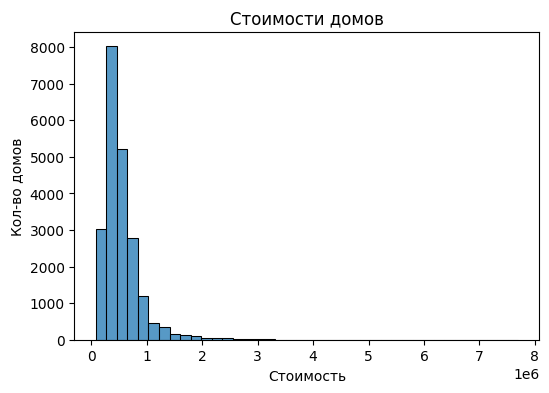

In [7]:
plt.figure(figsize=(6, 4))

sns.histplot(df['price'], bins=40)

plt.title('Стоимости домов')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во домов');

Вывод: Большинство домов стоят до 1 млн. 

### 1.3
Изучите распределение квадратуры жилой

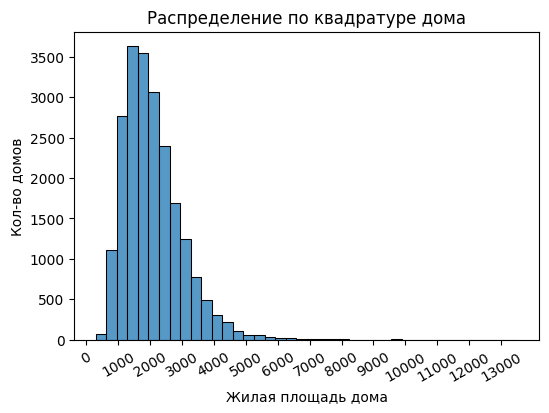

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(df['sqft_living'], bins=40)

plt.title('Распределение по квадратуре дома')
plt.xlabel('Жилая площадь дома')
plt.xticks(np.arange(0,14000,1000),rotation=30)

plt.ylabel('Кол-во домов');


Вывод: Самое большое количество домов имеют жилую площадь в промежутке от 1000 до 3000.

### 1.4
Изучите распределение года постройки

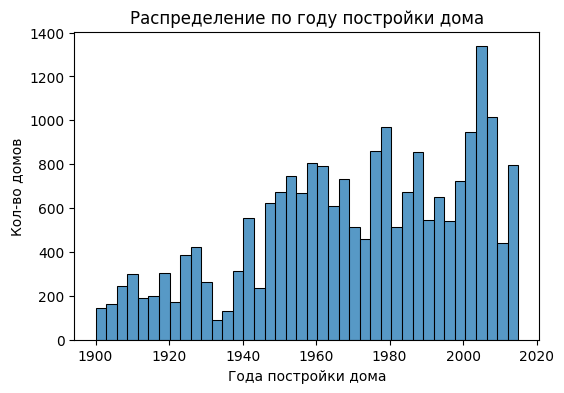

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df['yr_built'], bins=40)

plt.title('Распределение по году постройки дома')
plt.xlabel('Года постройки дома')
plt.ylabel('Кол-во домов');

Вывод: Чем позже год постройки, тем в среднем больше домов сохранилось. Больше всего домов после 2000 года.

## 2

### 2.1 
Изучите распределение домов от наличия вида на набережную

In [17]:
vc = df['waterfront'].value_counts()

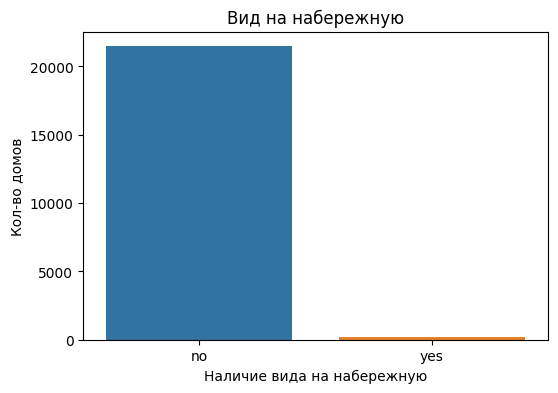

In [26]:
plt.figure(figsize=(6, 4))

sns.barplot(x=vc.index, y=vc.values)
plt.title('Вид на набережную')
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Кол-во домов')
plt.xticks([0, 1], ['no', 'yes']);


Вывод: Домов с видом на набережную намного меньше, чем с наличием такого вида.

## 2.2 
Изучите распределение этажей домов

In [28]:
vc1 = df['floors'].value_counts()

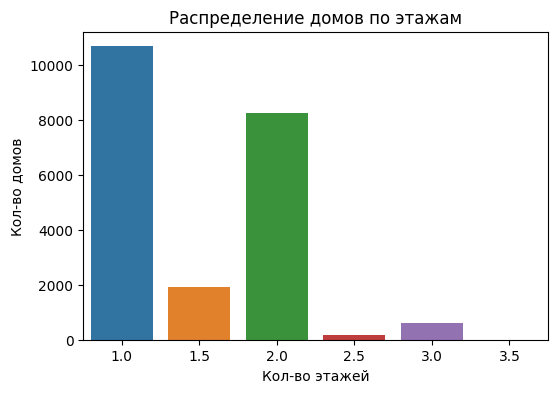

In [30]:
plt.figure(figsize=(6, 4))

sns.barplot(x=vc1.index, y=vc1.values)
plt.title('Распределение домов по этажам')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');


Вывод: Большинство домов имеют 1 или 2 этажа. 

## 2.3
Изучите распределение состояния домов

In [34]:
vc2 = df['condition'].value_counts()

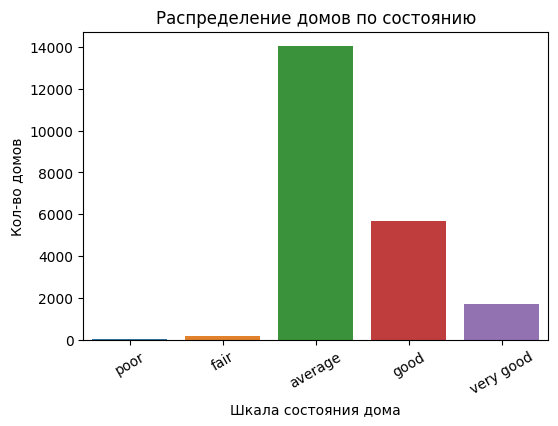

In [38]:
plt.figure(figsize=(6, 4))

sns.barplot(x=vc2.index, y=vc2.values)
plt.title('Распределение домов по состоянию')
plt.xlabel('Шкала состояния дома')
plt.ylabel('Кол-во домов');
plt.xticks([0,1, 2,3,4], ['poor', 'fair','average','good','very good'], rotation=30);

Вывод: Большинство домов находятся в среднем состоянии.

## 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

C:\Users\Elena\AppData\Local\Temp\ipykernel_1904\4255325961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


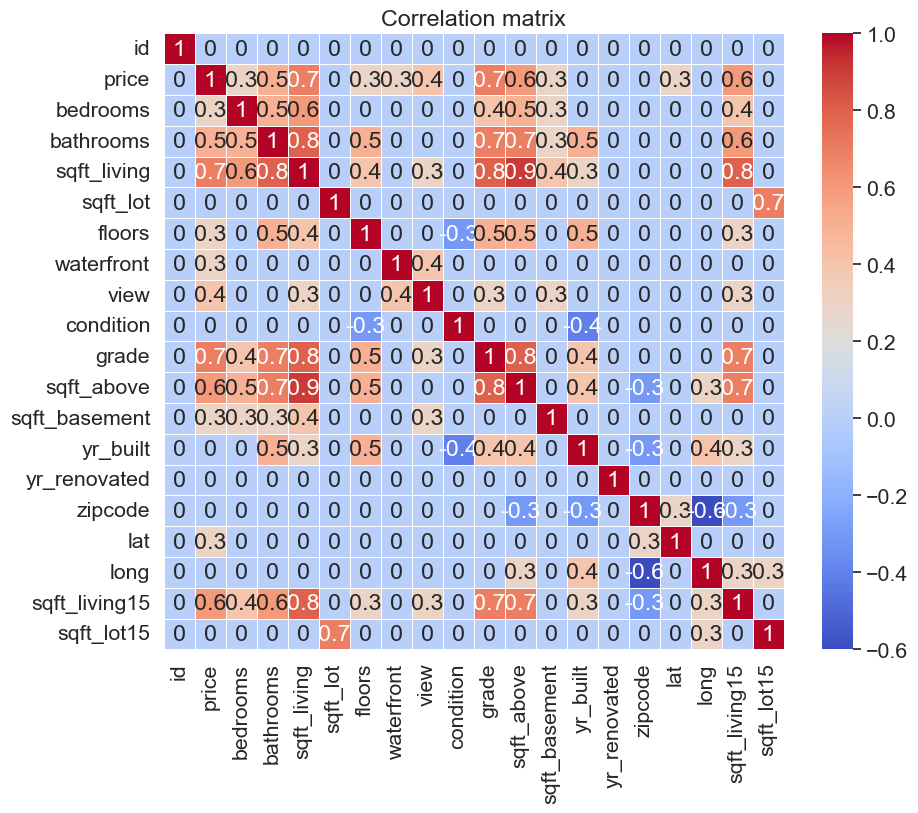

In [39]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

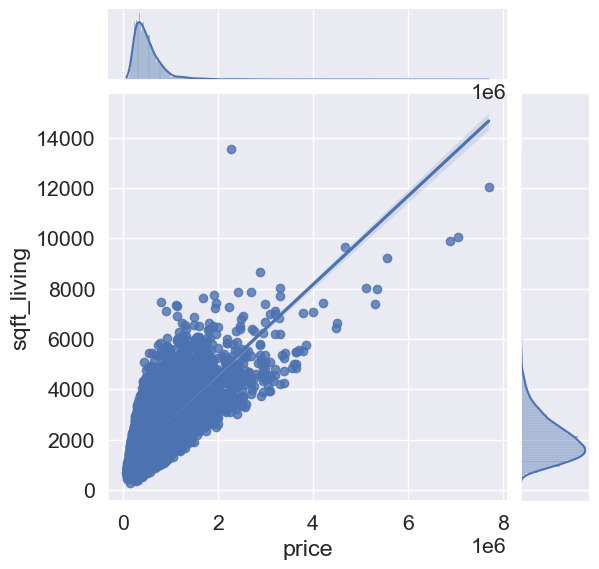

In [45]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

Вывод: На графике мы видим, что в основном имеется тенденция роста цены от роста жилой площади дома.

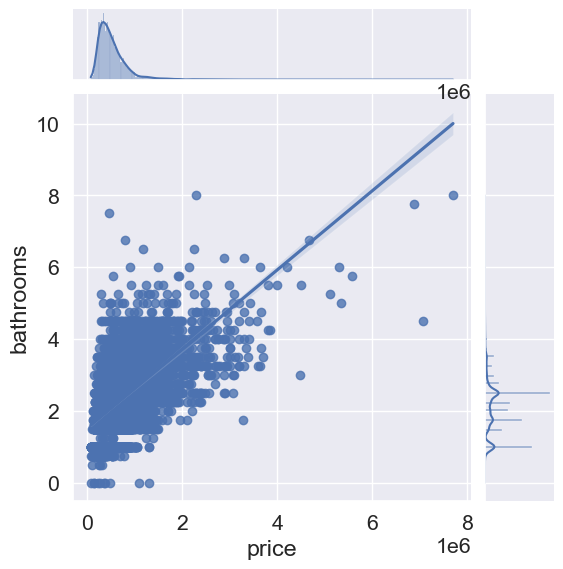

In [46]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

Вывод: При росте количества ванных комнат есть тенденция к росту цены дома.

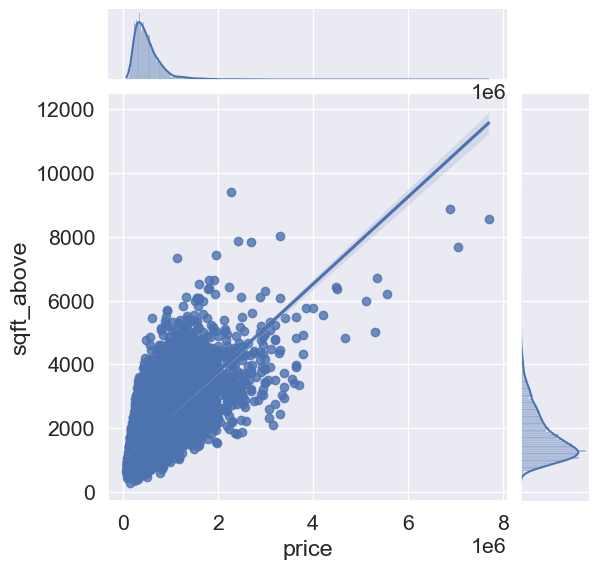

In [53]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

Вывод: Также мы видим тенденцию к росту цены при увеличении размера подвальных помещений.

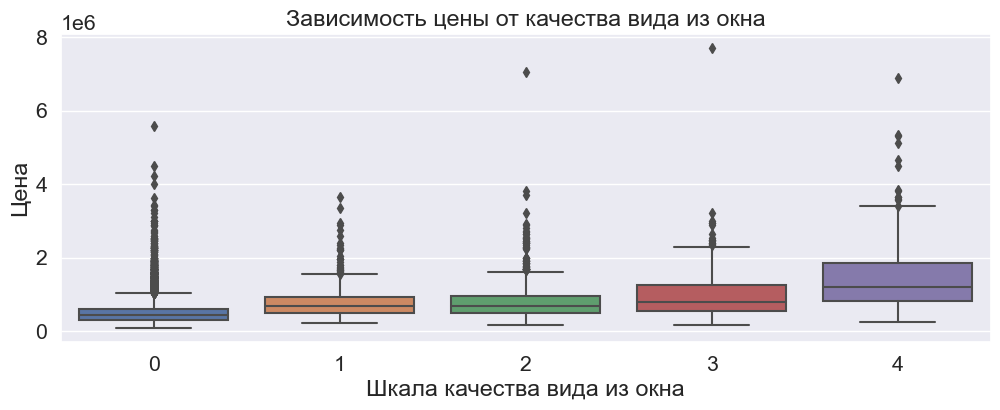

In [57]:
plt.figure(figsize=(12, 4))

sns.boxplot(y=df['price'],x=df['view'])

plt.title('Зависимость цены от качества вида из окна')
plt.xlabel('Шкала качества вида из окна')
plt.ylabel('Цена');

Ввод: График показывает, что чем лучше вид из окна, тем выше в среднем стоимость домов.

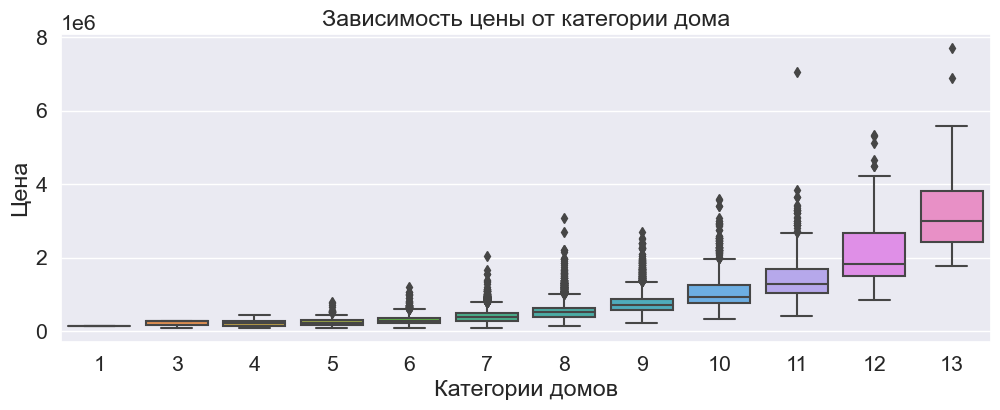

In [58]:
plt.figure(figsize=(12, 4))

sns.boxplot(y=df['price'],x=df['grade'])

plt.title('Зависимость цены от категории дома')
plt.xlabel('Категории домов')
plt.ylabel('Цена');

Вывод: На данном графике мы видим прямую зависимость стоимости дома от его категории.